Importing libraries

In [1]:
# Prerequisites

#Calculations
import numpy as np

#Data processing
import pandas as pd

#Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Collection of functions for scientific computing and advance mathematics
import scipy as sp

#Statistical Models
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the data file

In [2]:
data = pd.read_csv('Assignment_PA.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

The nunique() method returns the number of unique values for each column

In [4]:
data.nunique()

V1        962
V2        994
V3       1939
V4       1940
V5        920
V6        399
V7        317
V8       1909
V9        161
V10       100
V11        84
V12         2
V13         2
V14        24
V15      1387
V16      1338
V17       770
V18       454
V19       818
V20       648
V21         3
V22       914
V23       183
V24       217
V25       918
V26      1522
V27       388
V28         2
V29         2
V30         2
V31         2
V32         2
V33         2
Class       2
dtype: int64


Checking Values of Target Variable

In [5]:
data.Class.value_counts()

1    1268
2     673
Name: Class, dtype: int64

In [6]:
#HotCoding to change Class from 1,2 to 1,0
data["Class"] = data["Class"].replace(2, 0)

All the unique values for each column will store in data_objects. Dataframe is created by loading data_objects of unique values. We are selecting rows from V3 as we are using iloc function as data_objects.iloc[0: ]. Providing columns names to the two columns as objects and unique_count.

In [7]:
data_object = []
data_objects = data.nunique()
data_objects = pd.DataFrame(data_objects)
data_objects = data_objects.iloc[0:]
data_objects.reset_index(inplace=True)
data_objects.columns = ["Objects","Unique_count"]
print(data_objects)

   Objects  Unique_count
0       V1           962
1       V2           994
2       V3          1939
3       V4          1940
4       V5           920
5       V6           399
6       V7           317
7       V8          1909
8       V9           161
9      V10           100
10     V11            84
11     V12             2
12     V13             2
13     V14            24
14     V15          1387
15     V16          1338
16     V17           770
17     V18           454
18     V19           818
19     V20           648
20     V21             3
21     V22           914
22     V23           183
23     V24           217
24     V25           918
25     V26          1522
26     V27           388
27     V28             2
28     V29             2
29     V30             2
30     V31             2
31     V32             2
32     V33             2
33   Class             2


The loc() function helps us to retrieve data values from a data objects which is having unique values that are equal to 2.
Making a list of all the data objects whose unique value equal to 2


In [8]:
data_objects_select = data_objects.loc[data_objects['Unique_count'] == 2]
data_objects_select = list(data_objects_select.Objects)
data_objects_select

['V12', 'V13', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'Class']

Converting the fields in “data object select” to object datatype and confirming that the object type changed on the selected fields.

In [9]:
for i in data_objects_select :
  data[i] = data[i].astype("object")

data.info()
data_original = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   object 
 12  V13     1941 non-null   object 
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

The describe() method returns a description of the data in the DataFrame. Here, it will retrieve the information like count, unique, top and frequency as the data type is an object.


In [10]:
data.describe(include = 'O')

,V12,V13,V28,V29,V30,V31,V32,V33,Class
count,1941,1941,1941,1941,1941,1941,1941,1941,1941
unique,2,2,2,2,2,2,2,2,2
top,0,1,0,0,0,0,0,0,1
freq,1164,1164,1783,1751,1550,1869,1886,1539,1268


All the object data types are assigned to data_cat field and all the data types excluding object data type are assigned to data_num

In [11]:
data_cat = data.select_dtypes(include='object').columns
data_num = data.select_dtypes(exclude='object').columns

Verifying the null values in the dataset through heatmap and we observe that there is no missing data


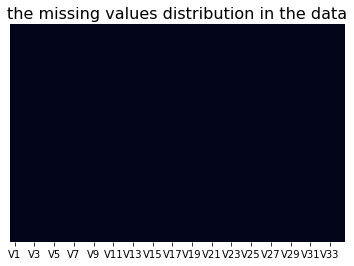

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.title('the missing values distribution in the data',fontsize=16)
plt.show()

Grubb's Test for Outlier Detection
Grubbs' test is defined for the hypothesis:
H0:	There are no outliers in the data set
Ha:	There is exactly one outlier in the data set
Test Statistic:	The Grubbs' test statistic is defined as:
G=max|Yi−Y¯|s
with Y¯ and s denoting the sample mean and standard deviation, respectively. The Grubbs' test statistic is the largest absolute deviation from the sample mean in units of the sample standard deviation.



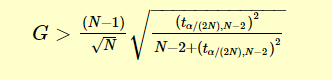

In [13]:
#Grubbs Test Function

def grubbs_test(x):
  global out
  n=len(x)
  mean_x = np.mean(x)
  sd_x = np.std(x)
  num = max(abs(x-mean_x))
  g_calculated = num/sd_x
  print("Grubbs Calcuated Value is : ",round(g_calculated,2))
  t_value = sp.stats.t.ppf((1-0.05)/(2*n), n-2)
  g_critical = ((n - 1)*np.sqrt(np.square(t_value)))/(np.sqrt(n)*np.sqrt(n - 2 + np.square(t_value)))
  print("Grubbs Critical Value is :",round(g_critical,2))
  if g_critical > g_calculated :
    out = "No outliers exsist"
    print(out)
  else :
    out = "Outliers exsist"
    print(out)

Making a list of numerical varaibles and plotting outliers in each variable and verifying if the outliers exist are not.


In [14]:
data_num_out = list()
for var in data_num:
  fig = px.violin(data, y=var, box=True, points='all')
  fig.show()
  print(grubbs_test(data[var]))
  if out == "Outliers exsist":
    data_num_out.append(str(var))

Grubbs Calcuated Value is :  2.18
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  2.2
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  6.39
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  6.39
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  29.18
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  34.33
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  42.38
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  22.23
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  3.69
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  6.57
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  2.32
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  4.02
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  2.21
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  3.86
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  2.08
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  14.29
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  2.45
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  3.27
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  1.19
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  3.41
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  3.61
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  6.29
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  2.15
Grubbs Critical Value is : 3.48
No outliers exsist
None


Grubbs Calcuated Value is :  5.83
Grubbs Critical Value is : 3.48
Outliers exsist
None


Grubbs Calcuated Value is :  1.37
Grubbs Critical Value is : 3.48
No outliers exsist
None


Removing variable V14 as we need the variable to test

In [15]:
data_num_out.remove("V14")

Winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.
With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. 


In [16]:
def winsor_outliers(df):
  global win_out
  win_out = []
  q1 = df.quantile(0.01)
  q3 = df.quantile(0.99)

  for i in df :
    if i>q3 or i<q1:
      win_out.append(i)
  print("q1:",q1 , "q2:",q3)
  print("Outliers : ", win_out)
  print("The number of outliers is : ",len(win_out))

In [17]:
for var in data_num_out:
  print(var)
  print(winsor_outliers(data[var]))

  data[var] = data[var].replace(
    to_replace=win_out, 
    value = "None" )

V3
q1: 28533.0 q2: 10359325.199999997
Outliers :  [21349, 19815, 11430396, 11741476, 12577343, 12725281, 12917033, 12987661, 21512, 9007, 13302, 19000, 7430, 15184, 10391495, 10507433, 7851, 11150448, 12438460, 12806495, 6712, 11066410, 11499942, 11569824, 12416454, 23288, 10369596, 10409376, 10440356, 10555505, 10624922, 28527, 14524, 9228, 12799, 18324, 23012, 7003, 15755, 21104]
The number of outliers is :  40
None
V4
q1: 28546.4 q2: 10359343.199999997
Outliers :  [21376, 19841, 11430416, 11741833, 12577396, 12725314, 12917094, 12987692, 21518, 9033, 13320, 19123, 7458, 15196, 10391507, 10507445, 7865, 11150470, 12438491, 12806520, 6724, 11066424, 11499957, 11569844, 12416473, 23316, 10369620, 10409388, 10440367, 10555515, 10624934, 28542, 14551, 9246, 12804, 18328, 23019, 7020, 15765, 21135]
The number of outliers is :  40
None
V5
q1: 12.800000000000004 q2: 18033.39999999999
Outliers :  [152655, 25323, 21110, 25473, 24365, 20894, 20726, 22554, 21987, 21036, 19629, 18517, 18071, 189

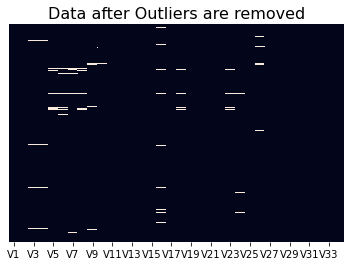

In [18]:
data=data.replace("None", np.nan) #replacing none values to NAN
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.title('Data after Outliers are removed',fontsize=16)
plt.show()

In [19]:
data_colname = data.columns
data_colname

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'Class'],
      dtype='object')

Replace NaN values with Knn Imputer

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)     
data_imputer = imputer.fit_transform(data)
data_imputer = pd.DataFrame(data_imputer,columns =data_colname)
data = data_imputer

In [21]:
data_object = []
data_objects = data.nunique()
data_objects = pd.DataFrame(data_objects)
data_objects = data_objects.iloc[0:]
data_objects.reset_index(inplace=True)
data_objects.columns = ["Objects","Unique_count"]
data_objects_select = data_objects.loc[data_objects['Unique_count'] == 2]
data_objects_select = list(data_objects_select.Objects)
for i in data_objects_select :
  data[i] = data[i].astype("object")

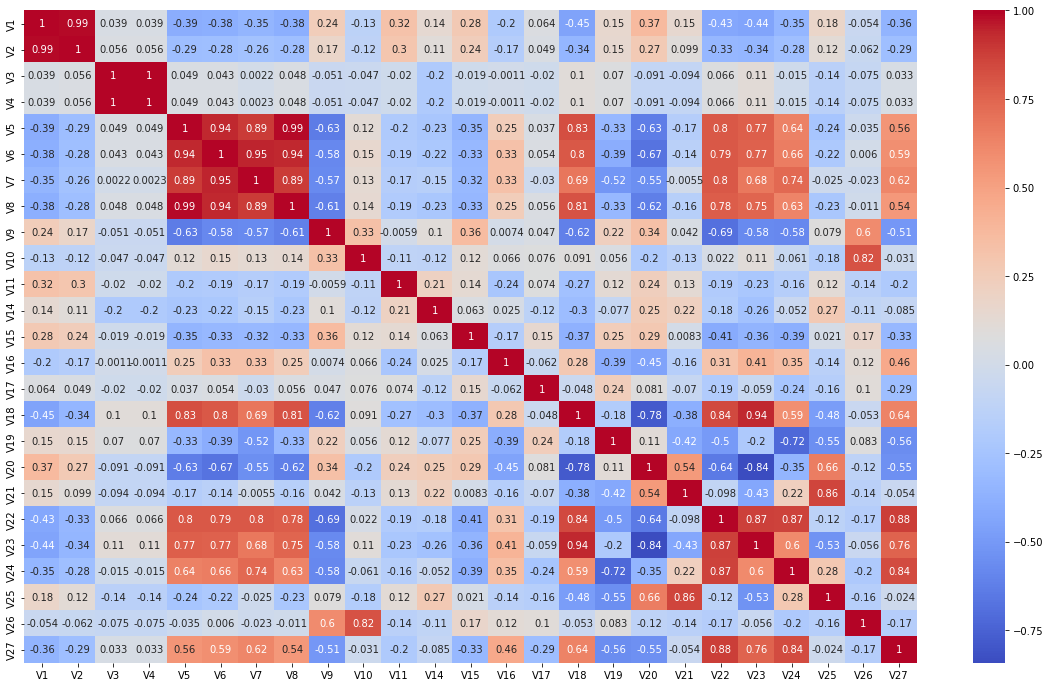

In [22]:
plt.subplots(figsize =(20, 12))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')

In [23]:
corrmat = data.corr()

In [24]:
def getcorel(data,threshold):
  corr_col=set()
  corrmat=data.corr()
  for i in range (len(corrmat.columns)):
    for j in range(i):
      if abs(corrmat.iloc[i,j])>threshold :
        colname = corrmat.columns [i]
        corr_col.add(colname)
  return corr_col

In [25]:
X = data.drop("Class", axis = 1)
y = data["Class"]

In [26]:
corr_feature = getcorel(X,0.90)
corr_feature

{'V2', 'V23', 'V4', 'V6', 'V7', 'V8'}

In [27]:
corrdata = corrmat.abs().stack()
corrdata = corrdata.sort_values(ascending=False)
corrdata = corrdata[corrdata>0.90]
corrdata = corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["features1","features2","corr_value"]
corrdata

,features1,features2,corr_value
0,V4,V3,1.000000
1,V3,V4,1.000000
2,V8,V5,0.992703
3,V5,V8,0.992703
4,V1,V2,0.988314
5,V2,V1,0.988314
6,V7,V6,0.948425
7,V6,V7,0.948425
8,V6,V5,0.939596
9,V5,V6,0.939596


In [28]:
grouped_feature_list = []
correlated_groups_list = []

for feature in corrdata.features1.unique():
  if feature not in grouped_feature_list:
    correlated_block = corrdata[corrdata.features1 == feature]
    grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
    correlated_groups_list.append(correlated_block)

In [29]:
correlated_groups_list

for group in correlated_groups_list:
  print(group)

  features1 features2  corr_value
0        V4        V3         1.0
   features1 features2  corr_value
2         V8        V5    0.992703
11        V8        V6    0.937805
  features1 features2  corr_value
4        V1        V2    0.988314
  features1 features2  corr_value
6        V7        V6    0.948425
   features1 features2  corr_value
12       V23       V18    0.936695


In [30]:
# Feature importance using RF classifier

from sklearn.ensemble import RandomForestClassifier
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    #features = col_names[features]
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    y= y.astype('int')
    rf.fit(data[features], y)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)


In [31]:
important_features

[features            V4
 importance    0.502034
 Name: 0, dtype: object, features            V8
 importance    0.392611
 Name: 0, dtype: object, features            V2
 importance    0.511688
 Name: 1, dtype: object, features            V7
 importance    0.503418
 Name: 0, dtype: object, features           V18
 importance    0.646545
 Name: 1, dtype: object]

In [32]:
X.drop(["V1","V3","V5","V6","V23"],axis = 1, inplace = True)
data.drop(["V1","V3","V5","V6","V23"],axis = 1, inplace = True)

In [33]:
#feature selection based on mutual information

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression

mi = mutual_info_classif(X,y.astype(int))
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values (ascending = False, inplace = True)

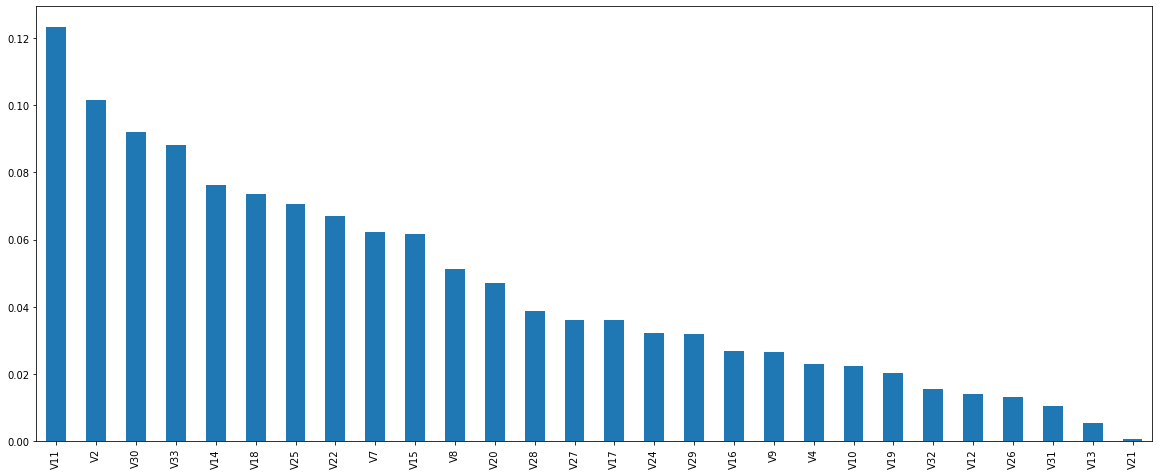

In [34]:
mi.plot.bar(figsize = (20,8))

In [35]:
midf = mi.to_frame('importance')
midf = midf[midf['importance'] >= 0.03]
keep = midf.index.values.tolist()
X = data[keep]

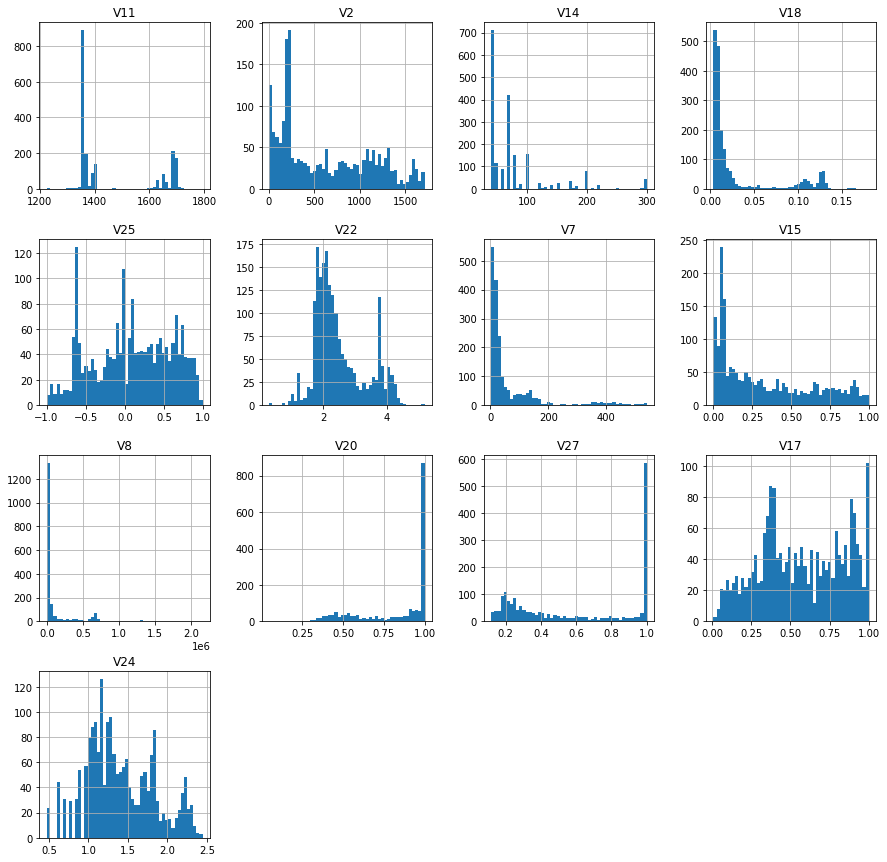

In [36]:
X.hist(bins=50, figsize=(15,15))
plt.show()

In [37]:
# #Normalizing Data
X_colname = X.columns
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = preprocessing.RobustScaler(unit_variance=True).fit_transform(X)
robust_df = pd.DataFrame(robust_df,columns =X_colname)
X=robust_df

In [38]:
# X_colname = X.columns
# from sklearn import preprocessing
# scale_df = preprocessing.MinMaxScaler(feature_range = (-1,1)).fit_transform(X)
# scale_df = pd.DataFrame(scale_df,columns =X_colname)
# X=scale_df

In [39]:
data_object = []
data_objects = X.nunique()
data_objects = pd.DataFrame(data_objects)
data_objects = data_objects.iloc[0:]
data_objects.reset_index(inplace=True)
data_objects.columns = ["Objects","Unique_count"]
data_objects_select = data_objects.loc[data_objects['Unique_count'] == 2]
data_objects_select = list(data_objects_select.Objects)
for i in data_objects_select :
  X[i] = X[i].astype("object")

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V11     1941 non-null   float64
 1   V2      1941 non-null   float64
 2   V30     1941 non-null   object 
 3   V33     1941 non-null   object 
 4   V14     1941 non-null   float64
 5   V18     1941 non-null   float64
 6   V25     1941 non-null   float64
 7   V22     1941 non-null   float64
 8   V7      1941 non-null   float64
 9   V15     1941 non-null   float64
 10  V8      1941 non-null   float64
 11  V20     1941 non-null   float64
 12  V28     1941 non-null   object 
 13  V27     1941 non-null   float64
 14  V17     1941 non-null   float64
 15  V24     1941 non-null   float64
 16  V29     1941 non-null   object 
dtypes: float64(13), object(4)
memory usage: 257.9+ KB


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

# Models


In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix


Naive Bayes Prediction and Score

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score
from sklearn.model_selection import cross_val_score
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predNB = nb.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predNB))
print('confusion matrix')
print(confusion_matrix(y_test, y_predNB))
print()
# Accuracy score
print('balanced accuracy score is ',balanced_accuracy_score(y_test,y_predNB))
print('cohen kappa score is ',cohen_kappa_score(y_test,y_predNB))
print()

NBB = balanced_accuracy_score(y_test,y_predNB)

#Cross Validation

NBcv = GaussianNB()
scoresNB = cross_val_score(NBcv, X_train, y_train, cv=10, scoring = "accuracy")
print('cross validation')
print("Scores:", scoresNB)
print()
print("Mean:", scoresNB.mean())
print("Standard Deviation:", scoresNB.std())



              precision    recall  f1-score   support

           0       0.82      1.00      0.90       203
           1       1.00      0.88      0.94       380

    accuracy                           0.92       583
   macro avg       0.91      0.94      0.92       583
weighted avg       0.94      0.92      0.92       583

confusion matrix
[[203   0]
 [ 45 335]]

balanced accuracy score is  0.9407894736842105
cohen kappa score is  0.8383001016980492

cross validation
Scores: [0.94117647 0.91911765 0.94117647 0.94852941 0.94852941 0.91911765
 0.94852941 0.94117647 0.97777778 0.88148148]

Mean: 0.936661220043573
Standard Deviation: 0.024155026724194156


KNN Prediction and Score

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

y_predKN = knn.predict (X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predKN))
print('confusion matrix')
print(confusion_matrix(y_test, y_predKN))
print()
# Accuracy score
print('balanced accuracy is ',balanced_accuracy_score(y_test,y_predKN))
print('cohen kappa score is ',cohen_kappa_score(y_test,y_predKN))
print()

KNN = balanced_accuracy_score(y_test,y_predKN)

#Cross Validation

KNcv = KNeighborsClassifier(n_neighbors=3)
scoresKN = cross_val_score(KNcv, X_train, y_train, cv=10, scoring = "accuracy")
print('cross validation')
print("Scores:", scoresKN)
print()
print("Mean:", scoresKN.mean())
print("Standard Deviation:", scoresKN.std())


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       203
           1       0.96      0.92      0.94       380

    accuracy                           0.92       583
   macro avg       0.91      0.92      0.92       583
weighted avg       0.93      0.92      0.92       583

confusion matrix
[[189  14]
 [ 31 349]]

balanced accuracy is  0.9247277676950998
cohen kappa score is  0.8332051192391077

cross validation
Scores: [0.96323529 0.94852941 0.95588235 0.91911765 0.91176471 0.90441176
 0.95588235 0.92647059 0.94814815 0.95555556]

Mean: 0.9388997821350762
Standard Deviation: 0.020239226352267468


Decision Tree Prediction and Score


In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score


DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_predDT = DT.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predDT))
print('confusion matrix')
print(confusion_matrix(y_test, y_predDT))

print()
# Accuracy score
print('balanced accuracy is ',balanced_accuracy_score(y_test,y_predDT))
print('cohen kappa score is ',cohen_kappa_score(y_test,y_predDT))
print()

DT = balanced_accuracy_score(y_test,y_predDT)

#Cross Validation

DTcv = DecisionTreeClassifier()
scoresDT = cross_val_score(DTcv, X_train, y_train, cv=10, scoring = "accuracy")
print('cross validation')
print("Scores:", scoresDT)
print()
print("Mean:", scoresDT.mean())
print("Standard Deviation:", scoresDT.std())

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       203
           1       0.98      0.98      0.98       380

    accuracy                           0.97       583
   macro avg       0.97      0.97      0.97       583
weighted avg       0.97      0.97      0.97       583

confusion matrix
[[196   7]
 [  9 371]]

balanced accuracy is  0.9709165154264974
cohen kappa score is  0.9396769145207393

cross validation
Scores: [0.94117647 0.97794118 0.97794118 0.98529412 0.94852941 0.97058824
 0.97058824 0.98529412 1.         0.96296296]

Mean: 0.9720315904139435
Standard Deviation: 0.01671725150639745


LDA

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_predLD = lda.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predLD))
print('confusion matrix')
print(confusion_matrix(y_test, y_predLD))

print()

# Accuracy score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predLD))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predLD))
print()

LDA = balanced_accuracy_score(y_test,y_predLD)

#Cross Validation

ldacv = LinearDiscriminantAnalysis()
scoresLDA = cross_val_score(ldacv, X_train, y_train, cv=10, scoring = "accuracy")
print('cross validation')
print("Scores:", scoresLDA)
print()
print("Mean:", scoresLDA.mean())
print("Standard Deviation:", scoresLDA.std())

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       203
           1       1.00      0.88      0.94       380

    accuracy                           0.92       583
   macro avg       0.91      0.94      0.92       583
weighted avg       0.94      0.92      0.93       583

confusion matrix
[[203   0]
 [ 44 336]]

Balanced accuracy is 0.9421052631578948
cohen kappa score is 0.8417207591875016

cross validation
Scores: [0.94117647 0.92647059 0.94117647 0.95588235 0.95588235 0.93382353
 0.95588235 0.94852941 0.98518519 0.87407407]

Mean: 0.9418082788671024
Standard Deviation: 0.02721890914862407


Nu-SVC

In [47]:
from sklearn.svm import NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score

NUS = NuSVC()
NUS.fit(X_train, y_train)
y_predNU = NUS.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predNU))
print('confusion matrix')
print(confusion_matrix(y_test, y_predNU))

print()

# Accuracy score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predNU))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predNU))
print()

NUS = balanced_accuracy_score(y_test,y_predNU)

#Cross Validation
NuCv = NuSVC()
scoresNUS = cross_val_score(NuCv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scoresNUS)
print()
print("Mean:", scoresNUS.mean())
print("Standard Deviation:", scoresNUS.std())

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       203
           1       0.99      0.88      0.93       380

    accuracy                           0.92       583
   macro avg       0.90      0.93      0.91       583
weighted avg       0.93      0.92      0.92       583

confusion matrix
[[200   3]
 [ 46 334]]

Balanced accuracy is 0.93208452164895
cohen kappa score is 0.8235417657559716

Scores: [0.93382353 0.91911765 0.94117647 0.94852941 0.94852941 0.91176471
 0.96323529 0.94117647 0.97037037 0.87407407]

Mean: 0.9351797385620915
Standard Deviation: 0.026449650240505686


Extra Trees Classfier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score

excla = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2)
excla.fit(X_train, y_train)
y_predET = excla.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predET))
print('confusion matrix')
print(confusion_matrix(y_test, y_predET))

print()

# Accuracy score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predET))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predET))
print()

ETC = balanced_accuracy_score(y_test,y_predET)

#Cross Validation
exclacv = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scoreET = cross_val_score(exclacv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scoreET)
print()
print("Mean:", scoreET.mean())
print("Standard Deviation:", scoreET.std())

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       203
           1       1.00      0.97      0.99       380

    accuracy                           0.98       583
   macro avg       0.97      0.99      0.98       583
weighted avg       0.98      0.98      0.98       583

confusion matrix
[[203   0]
 [ 11 369]]

Balanced accuracy is 0.9855263157894737
cohen kappa score is 0.9589507575515116

Scores: [0.96323529 0.98529412 0.99264706 0.99264706 0.97794118 0.98529412
 0.98529412 0.97794118 1.         0.98518519]

Mean: 0.9845479302832245
Standard Deviation: 0.009558041418201811


Gradient Boost


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(X_train, y_train)
y_predGR=ModelG.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predGR))
print('confusion matrix')
print(confusion_matrix(y_test, y_predGR))

# Accuracy score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predGR))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predGR))
print()

GR = balanced_accuracy_score(y_test,y_predGR)

#Cross Validation
GRcv = GradientBoostingClassifier()
scoreGR = cross_val_score(GRcv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scoreGR)
print()
print("Mean:", scoreGR.mean())
print("Standard Deviation:", scoreGR.std())


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       203
           1       1.00      0.97      0.98       380

    accuracy                           0.98       583
   macro avg       0.97      0.98      0.98       583
weighted avg       0.98      0.98      0.98       583

confusion matrix
[[202   1]
 [ 12 368]]
Balanced accuracy is 0.9817474721285974
cohen kappa score is 0.9514872589245137

Scores: [0.97058824 0.96323529 0.98529412 0.99264706 0.97058824 0.97794118
 0.98529412 0.97794118 1.         0.96296296]

Mean: 0.978649237472767
Standard Deviation: 0.01163921818203147


Logistic Regression

In [50]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_predLR))
print('confusion matrix')
print(confusion_matrix(y_test, y_predLR))

# Accuracy score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predLR))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predLR))
print()

LR = balanced_accuracy_score(y_test,y_predLR)
#Cross Validation
LRcv = LogisticRegression()
scoreLR = cross_val_score(LRcv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scoreLR)
print()
print("Mean:", scoreLR.mean())
print("Standard Deviation:", scoreLR.std())

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       203
           1       0.99      0.93      0.96       380

    accuracy                           0.95       583
   macro avg       0.94      0.96      0.95       583
weighted avg       0.96      0.95      0.95       583

confusion matrix
[[201   2]
 [ 26 354]]
Balanced accuracy is 0.9608633653098263
cohen kappa score is 0.8970276544206701

Scores: [0.94852941 0.94852941 0.95588235 0.97794118 0.97058824 0.95588235
 0.95588235 0.95588235 0.99259259 0.95555556]

Mean: 0.9617265795206972
Standard Deviation: 0.013480299729002464


Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_predR=rf.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_predR))
print('confusion matrix')
print(confusion_matrix(y_predR,y_test))

#Accuracy Score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predR))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predR))
print()

RF = balanced_accuracy_score(y_test,y_predR)

#Cross Validation
rfcv = RandomForestClassifier(max_depth=2)
scoreRF = cross_val_score(rfcv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scoreRF)
print()
print("Mean:", scoreRF.mean())
print("Standard Deviation:", scoreRF.std())

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       203
           1       0.99      0.97      0.98       380

    accuracy                           0.98       583
   macro avg       0.97      0.98      0.97       583
weighted avg       0.98      0.98      0.98       583

confusion matrix
[[201  12]
 [  2 368]]
Balanced accuracy is 0.9792844179414053
cohen kappa score is 0.947696251201538

Scores: [0.75735294 0.73529412 0.77941176 0.72058824 0.72794118 0.73529412
 0.75       0.81617647 0.74814815 0.77037037]

Mean: 0.754057734204793
Standard Deviation: 0.02708568207058334


ADABOOST

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score

ada=AdaBoostClassifier()
ada.fit(X_train, y_train)
y_predAD=ada.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_predAD))
print('confusion matrix')
print(confusion_matrix(y_predAD,y_test))

#Accuracy Score
print('Balanced accuracy is',balanced_accuracy_score(y_test,y_predAD))
print('cohen kappa score is',cohen_kappa_score(y_test,y_predAD))
print()

ADA = balanced_accuracy_score(y_test,y_predAD)

#Cross Validation
adacv=AdaBoostClassifier()
scoreADA = cross_val_score(adacv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scoreADA)
print()
print("Mean:", scoreADA.mean())
print("Standard Deviation:", scoreADA.std())

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       203
           1       0.99      0.98      0.99       380

    accuracy                           0.98       583
   macro avg       0.98      0.99      0.98       583
weighted avg       0.98      0.98      0.98       583

confusion matrix
[[201   7]
 [  2 373]]
Balanced accuracy is 0.9858633653098263
cohen kappa score is 0.9661843843650307

Scores: [0.97058824 0.97058824 0.99264706 0.99264706 0.98529412 0.99264706
 0.98529412 0.97794118 1.         0.94814815]

Mean: 0.9815795206971677
Standard Deviation: 0.014515139159259855


In [53]:
models = pd.DataFrame({
    'Model': ['Decision Tree','LogisticRegression','K-Nearest Neighbours', 'Naive Bayes','Linear Discriminant Analysis', 
              'Nu-Support Vector Classification','Extra Tree Classifier','Gradiant Boost','Random Forest','AdaBoost'],
    'Score': [DT, LR, KNN, NBB, LDA, NUS, ETC, GR, RF, ADA],
    'CV Mean' : [scoresDT.mean(),scoreLR.mean(),scoresKN.mean(),scoresNB.mean(),scoresLDA.mean(),
                 scoresNUS.mean(),scoreET.mean(),scoreGR.mean(),scoreRF.mean(),scoreADA.mean()],
    'CV Std' : [scoresDT.std(),scoreLR.std(),scoresKN.std(),scoresNB.std(),scoresLDA.std(),
                scoresNUS.std(),scoreET.std(),scoreGR.std(),scoreRF.std(),scoreADA.std()]    
    })
models = models.sort_values(by='Score', ascending=False)
models.reset_index(drop=True, inplace=True)
models

,Model,Score,CV Mean,CV Std
0,AdaBoost,0.985863,0.981580,0.014515
1,Extra Tree Classifier,0.985526,0.984548,0.009558
2,Gradiant Boost,0.981747,0.978649,0.011639
3,Random Forest,0.979284,0.754058,0.027086
4,Decision Tree,0.970917,0.972032,0.016717
5,LogisticRegression,0.960863,0.961727,0.013480
6,Linear Discriminant Analysis,0.942105,0.941808,0.027219
7,Naive Bayes,0.940789,0.936661,0.024155
8,Nu-Support Vector Classification,0.932085,0.935180,0.026450
9,K-Nearest Neighbours,0.924728,0.938900,0.020239


Desicion Tree ROC is  0.9709165154264974
Logistic Regression ROC is  0.9608633653098263
Naive Bayes ROC is  0.9407894736842105
K-Nearest Neighbours is  0.9247277676950999
Linear Discriminant Analysis is  0.9421052631578948
Nu-Support Classification is  0.93208452164895
Extra Tree Classifier is  0.9855263157894737
Gradient Boost is  0.9817474721285974
Random Forest is  0.9792844179414052
AdaBoost is  0.9858633653098263


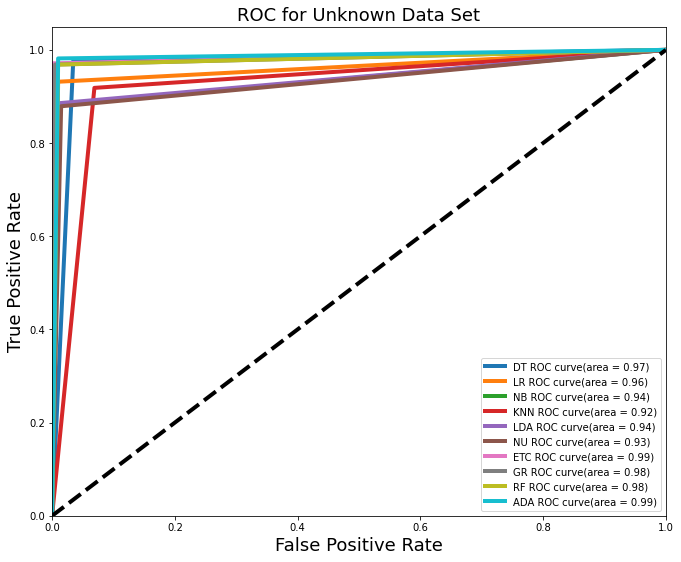

In [54]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
FPR_1, TPR_1, _ = roc_curve(y_test, y_predDT)
FPR_2, TPR_2, _ = roc_curve(y_test, y_predLR)
FPR_3, TPR_3, _ = roc_curve(y_test, y_predNB)
FPR_4, TPR_4, _ = roc_curve(y_test, y_predKN)
FPR_5, TPR_5, _ = roc_curve(y_test, y_predLD)
FPR_6, TPR_6, _ = roc_curve(y_test, y_predNU)
FPR_7, TPR_7, _ = roc_curve(y_test, y_predET)
FPR_8, TPR_8, _ = roc_curve(y_test, y_predGR)
FPR_9, TPR_9, _ = roc_curve(y_test, y_predR)
FPR_10, TPR_10, _ = roc_curve(y_test, y_predAD)

ROC_AUC_1 = auc(FPR_1, TPR_1)
ROC_AUC_2 = auc(FPR_2, TPR_2)
ROC_AUC_3 = auc(FPR_3, TPR_3)
ROC_AUC_4 = auc(FPR_4, TPR_4)
ROC_AUC_5 = auc(FPR_5, TPR_5)
ROC_AUC_6 = auc(FPR_6, TPR_6)
ROC_AUC_7 = auc(FPR_7, TPR_7)
ROC_AUC_8 = auc(FPR_8, TPR_8)
ROC_AUC_9 = auc(FPR_9, TPR_9)
ROC_AUC_10 = auc(FPR_10, TPR_10)



print ("Desicion Tree ROC is ", ROC_AUC_1)
print ("Logistic Regression ROC is ", ROC_AUC_2)
print ("Naive Bayes ROC is ", ROC_AUC_3)
print ("K-Nearest Neighbours is ", ROC_AUC_4)
print ("Linear Discriminant Analysis is ", ROC_AUC_5)
print ("Nu-Support Classification is ", ROC_AUC_6)
print ("Extra Tree Classifier is ", ROC_AUC_7)
print ("Gradient Boost is ", ROC_AUC_8)
print ("Random Forest is ", ROC_AUC_9)
print ("AdaBoost is ", ROC_AUC_10)


plt.figure(figsize =[11,9])
plt.plot(FPR_1, TPR_1, label= 'DT ROC curve(area = %0.2f)'%ROC_AUC_1, linewidth= 4)
plt.plot(FPR_2, TPR_2, label= 'LR ROC curve(area = %0.2f)'%ROC_AUC_2, linewidth= 4)
plt.plot(FPR_3, TPR_3, label= 'NB ROC curve(area = %0.2f)'%ROC_AUC_3, linewidth= 4)
plt.plot(FPR_4, TPR_4, label= 'KNN ROC curve(area = %0.2f)'%ROC_AUC_4, linewidth= 4)
plt.plot(FPR_5, TPR_5, label= 'LDA ROC curve(area = %0.2f)'%ROC_AUC_5, linewidth= 4)
plt.plot(FPR_6, TPR_6, label= 'NU ROC curve(area = %0.2f)'%ROC_AUC_6, linewidth= 4)
plt.plot(FPR_7, TPR_7, label= 'ETC ROC curve(area = %0.2f)'%ROC_AUC_7, linewidth= 4)
plt.plot(FPR_8, TPR_8, label= 'GR ROC curve(area = %0.2f)'%ROC_AUC_8, linewidth= 4)
plt.plot(FPR_9, TPR_9, label= 'RF ROC curve(area = %0.2f)'%ROC_AUC_9, linewidth= 4)
plt.plot(FPR_10, TPR_10, label= 'ADA ROC curve(area = %0.2f)'%ROC_AUC_10, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Unknown Data Set', fontsize= 18)
plt.legend()
plt.show()